# PYTHON PANDAS SERIES

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.).

## Example 1

In [1]:
import pandas as pd

data = [0, 1, 2, 3]

ser = pd.Series(data)
print(ser)

0    0
1    1
2    2
3    3
dtype: int64


## Example 2

In [3]:
import pandas as pd

ages = [20, 25, 30, 35]
s = pd.Series(ages, index=["Mike", "Jane", "Mary", "Joe"])
print(s)

Mike    20
Jane    25
Mary    30
Joe     35
dtype: int64


## Example 3 Creating a Series from a dictionary

In [4]:
import pandas as pd

salaries = {
    "Mike": 50000,
    "Jane": 45000,
    "Mary": 37000,
    "Joe": 40000
}

s = pd.Series(salaries)
print(s)

Mike    50000
Jane    45000
Mary    37000
Joe     40000
dtype: int64


## Example 4 Creating a Series from a DataFrame

In [5]:
import pandas as pd

# Sample DataFrame
data = {
    "Name": ["Mike", "Jane", "Mary", "Joe"],
    "Age": [20, 25, 30, 35],
    "Salary": [50000, 45000, 37000, 40000]
}

df = pd.DataFrame(data)

Let's choose age to be our series

In [6]:
age_series = df["Age"]
print(age_series)

0    20
1    25
2    30
3    35
Name: Age, dtype: int64


In [ ]:
Or, you can also choose this way

In [7]:
#valid but redundant
ageSeries = pd.Series(df["Age"])
print(ageSeries)

0    20
1    25
2    30
3    35
Name: Age, dtype: int64


# SOME SERIES OPERATIONS

Let's create a dataframe about students results

In [1]:
import pandas as pd

data = {
    "Name": ["Alice", "Brian", "Cathy", "David", "Ella",
             "Frank", "Grace", "Hannah", "Ian", "Julia"],
    "Math": [88, 75, 93, 64, 70, 85, 78, 90, 66, 80],
    "English": [92, 81, 85, 77, 88, 70, 79, 95, 73, 84],
    "Physics": [75, 80, 72, 68, 90, 85, 60, 78, 82, 76],
    "Biology": [85, 79, 88, 70, 92, 83, 75, 89, 65, 80]
}

df = pd.DataFrame(data)
print(df)

     Name  Math  English  Physics  Biology
0   Alice    88       92       75       85
1   Brian    75       81       80       79
2   Cathy    93       85       72       88
3   David    64       77       68       70
4    Ella    70       88       90       92
5   Frank    85       70       85       83
6   Grace    78       79       60       75
7  Hannah    90       95       78       89
8     Ian    66       73       82       65
9   Julia    80       84       76       80


1. Total marks per student

In [2]:
# axis=1 means sum across columns (i.e., row-wise)
# This adds a new column to your DataFrame.
df["Totals"] = df[["Math", "English", "Physics", "Biology"]].sum(axis=1)

Lets preview

In [3]:
print(df[["Name", "Totals"]])

     Name  Totals
0   Alice     340
1   Brian     315
2   Cathy     338
3   David     279
4    Ella     340
5   Frank     323
6   Grace     292
7  Hannah     352
8     Ian     286
9   Julia     320


2. Average score per subject

In [8]:
sub_avg = df[["Math", "English", "Physics", "Biology"]].mean()
print(sub_avg)

Math       78.9
English    82.4
Physics    76.6
Biology    80.6
dtype: float64


3. Top Scorer in each subject

".idxmax()" method is used to find the highest number in a column

In [4]:
# highest mark in maths
top_math_name = df.loc[df["Math"].idxmax(), "Name"]
top_math_score = df.loc[df["Math"].idxmax(), "Math"]
print(f"Top scorer in Math: {top_math_name} with {top_math_score}")

Top scorer in Math: Cathy with 93


In [5]:
#highest mark in english
top_eng_name = df.loc[df["English"].idxmax(), "Name"]
top_eng_score = df.loc[df["English"].idxmax(), "English"]
print(f"Top scorer in English: {top_eng_name} with {top_eng_score}")

Top scorer in English: Hannah with 95


In [6]:
#highest physics score
top_phy_name = df.loc[df["Physics"].idxmax(), "Name"]
top_phy_score = df.loc[df["Physics"].idxmax(), "Physics"]
print(f"Top scorer in Physics: {top_phy_name} with {top_phy_score}")

Top scorer in Physics: Ella with 90


In [7]:
#highest biology score
top_bio_name = df.loc[df["Biology"].idxmax(), "Name"]
top_bio_score = df.loc[df["Biology"].idxmax(), "Biology"]
print(f"Top scorer in Biology: {top_bio_name} with {top_bio_score}")

Top scorer in Biology: Ella with 92


Using a for loop

In [8]:
# List of subjects
subjects = ["Math", "English", "Physics", "Biology"]

# Loop through each subject to find the top scorer
for subject in subjects:
    # Get the name and score of the top scorer in the subject
    top_scorer_name = df.loc[df[subject].idxmax(), "Name"]
    top_scorer_score = df.loc[df[subject].idxmax(), subject]
    
    # Print the result
    print(f"Top scorer in {subject}: {top_scorer_name} with {top_scorer_score}")

Top scorer in Math: Cathy with 93
Top scorer in English: Hannah with 95
Top scorer in Physics: Ella with 90
Top scorer in Biology: Ella with 92


4. Filtering Students (e.g., Total > 300)

In [17]:
filtered_students = df[df["Totals"] >= 300]
print(filtered_students)

     Name  Math  English  Physics  Biology  Totals
0   Alice    88       92       75       85     340
1   Brian    75       81       80       79     315
2   Cathy    93       85       72       88     338
4    Ella    70       88       90       92     340
5   Frank    85       70       85       83     323
7  Hannah    90       95       78       89     352
9   Julia    80       84       76       80     320


5. Creating a Grade Column Based on Total Marks

".apply()" is  to apply the assign_grade() function to each student's total marks.

In [9]:
def assign_grade(total):
    if total > 360:
        return "A"
    elif total > 300:
        return "B"
    elif total > 240:
        return "C"
    else:
        return "D"

df["Grade"] = df["Totals"].apply(assign_grade)
print(df[["Name", "Totals", "Grade"]])

     Name  Totals Grade
0   Alice     340     B
1   Brian     315     B
2   Cathy     338     B
3   David     279     C
4    Ella     340     B
5   Frank     323     B
6   Grace     292     C
7  Hannah     352     B
8     Ian     286     C
9   Julia     320     B


6. Ranking Students by Subject

In [ ]:
+ **.rank(ascending=False)** gives the highest score as rank 1.
+ **The method="min"** ensures that students with the same score get the same rank.

In [10]:
# Ranking students by Math scores (highest = 1)
df["Math_Rank"] = df["Math"].rank(ascending=False, method="min")
print(df[["Name", "Math", "Math_Rank"]])

     Name  Math  Math_Rank
0   Alice    88        3.0
1   Brian    75        7.0
2   Cathy    93        1.0
3   David    64       10.0
4    Ella    70        8.0
5   Frank    85        4.0
6   Grace    78        6.0
7  Hannah    90        2.0
8     Ian    66        9.0
9   Julia    80        5.0


In [ ]:
7. Rank Students by Highest Total Score

In [11]:
df["Total_Rank"] = df["Totals"].rank(ascending=False, method="min")
print(df[["Name", "Totals", "Total_Rank"]])

     Name  Totals  Total_Rank
0   Alice     340         2.0
1   Brian     315         7.0
2   Cathy     338         4.0
3   David     279        10.0
4    Ella     340         2.0
5   Frank     323         5.0
6   Grace     292         8.0
7  Hannah     352         1.0
8     Ian     286         9.0
9   Julia     320         6.0


In [ ]:
8. VISUALIZING 🤯🤯

Visualize Subject Scores for All Students

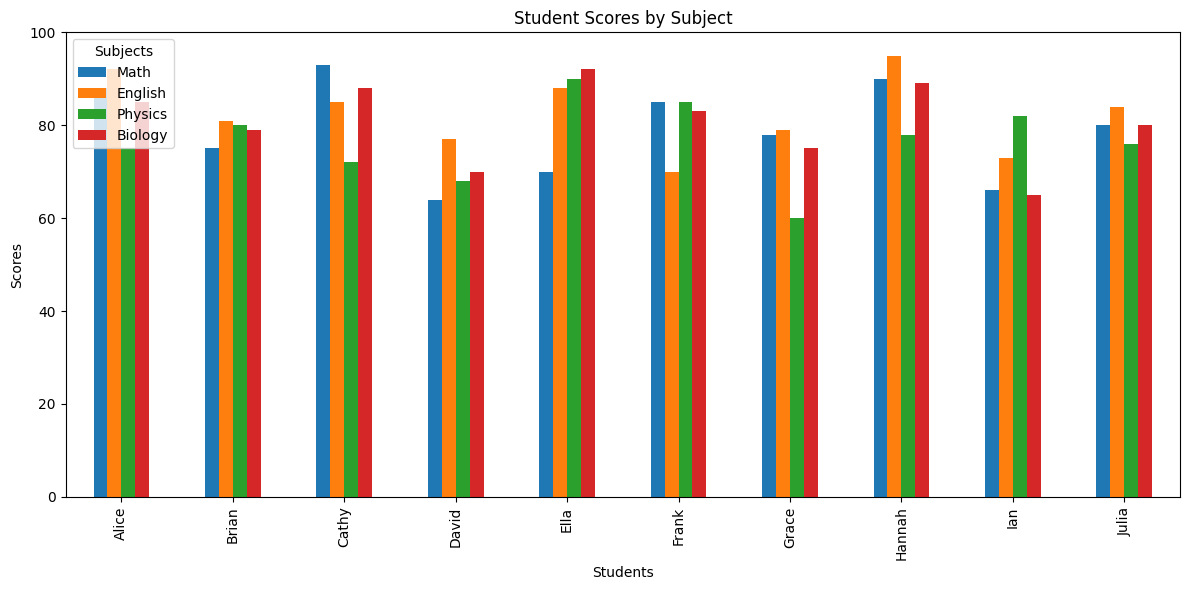

In [16]:
import matplotlib.pyplot as plt

# Set the student names as the index (optional, for cleaner x-axis labels)


# Plot the subject scores
df[["Math", "English", "Physics", "Biology"]].plot(kind="bar", figsize=(12, 6))

# Beautify it
plt.title("Student Scores by Subject")
plt.xlabel("Students")
plt.ylabel("Scores")
plt.ylim(0, 100)
plt.legend(title="Subjects")
plt.tight_layout()
plt.show()